In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

##  EJERCICIO 5: apartado A 

#### Test KS

In [4]:
mu_0 = 500
sigma = 100
alpha = 0.05

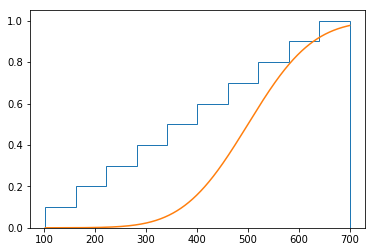

In [24]:
df = pd.read_excel('IQTest.xlsx')
IQ_test = df['IQ_Test_2018'].sort_values(axis = 0,ascending = True)
data_test = pd.Series.tolist(IQ_test)


n = len(data_test)

X = ss.norm(loc = mu_0, scale = sigma)

x = np.linspace(min(data_test),max(data_test),10000) #cogemos 10000 numeros entre el valor minimo y el valor maximo de los datos

plt.hist(x, density=True, histtype='step',cumulative=True) #pintamos la escalonada
plt.plot(x,X.cdf(x))
plt.show()

In [17]:
def KS(L,loc, scale): #Definir una función que devuelva el valor D para el test de KS
    n=len(L)
    vec1=[]
    vec2 = []
    X = ss.norm(loc = loc, scale = scale)
    for j in range(n):
        vec1 += [((j+1)/n)-X.cdf(L[j])]
        vec2 += [X.cdf(L[j])-(j/n)]
    Dmas = max(vec1)
    Dmen = max(vec2)
    tot = max(Dmas,Dmen)
    return(tot)

In [26]:
alpha = 0.05
D = (KS(data_test,500,100))
D_alpha = 1.36/np.sqrt(len(IQ_test)) #miramos el valor en las tablas
D

0.2926468578727992

In [14]:
ss.kstest(IQ_test,'norm',(500,100)) #da lo mismo de las dos manera, BIEN

KstestResult(statistic=0.2926468578727992, pvalue=1.1401630487222169e-15)

In [27]:
if D > D_alpha:
    print('Rechazamos hipotesis nula')
else: 
    print('Aceptamos hipotesis nula')

Rechazamos hipotesis nula


#### Test de Lilliefors

In [29]:
D_1 = KS(data_test,np.mean(data_test),ss.sem(data_test)*np.sqrt(len(data_test)))
D_1

0.038301610202139014

## APARTADO B

In [32]:
media = np.mean(data_test)

def contrast_hip_norm1(muestra,alpha, mu_0): #Una función que devuelva por pantalla si se rechaza H_0 o H_1#
    n = len(muestra)
    m = np.mean(muestra)
    s_error = ss.sem(muestra) #calculamos el denominador
    t = (m-mu_0)/s_error #integramos todo para calcular la t de arriba
    if t<ss.t.ppf(alpha,n-1): #calculamos los percentiles para ver donde esta el punto critico.
        print('Rechazamos H0')
    else:
        print('Rechazamos H1')
        
contrast_hip_norm1(data_test,0.05,media)

Rechazamos H1


## APARTADO C

In [33]:
mu_1 = 450

In [58]:
def potencia(mu_0,mu_1,sigma,muestra,alpha):
    n=len(muestra)
    z_alf = ss.t.ppf(alpha,n-1)
    r = z_alf + (mu_0-mu_1)*np.sqrt(n)/sigma
    return ss.t.cdf(r,n-1)
          
print(potencia(mu_0,mu_1,100,data_test,0.05))

0.999999913722


## APARTADO D 

In [62]:
mu_1 = 450
potencia = 0.8
alpha = 0.05
n = len(data_test)
sigma = 100
mu_0 = 500
mu_1 = 450

poblacion = (ss.t.ppf(1-alpha,n-1) + ss.t.ppf(potencia,n-1))**2*sigma**2/(mu_0 - mu_1)**2

In [63]:
print(round(poblacion)) #población 

25.0
